In [1]:
import zipfile
zip_file_path = 'archive (6).zip'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('dogs-vs-cats')  

In [2]:
import os
extracted_folder = 'dogs-vs-cats'
extracted_files = os.listdir(extracted_folder)
print(extracted_files)

# Define the correct paths for the 'cats' and 'dogs' folders
cats_dir = 'C:/Users/Gopib/Downloads/archive (6)/training_set/training_set/cats'
dogs_dir = 'C:/Users/Gopib/Downloads/archive (6)/training_set/training_set/dogs'


['test_set', 'training_set']


Loaded 4000 cat images.
Loaded 4005 dog images.
Training data shape: (6404, 150, 150, 3), (6404,)
Test data shape: (1601, 150, 150, 3), (1601,)


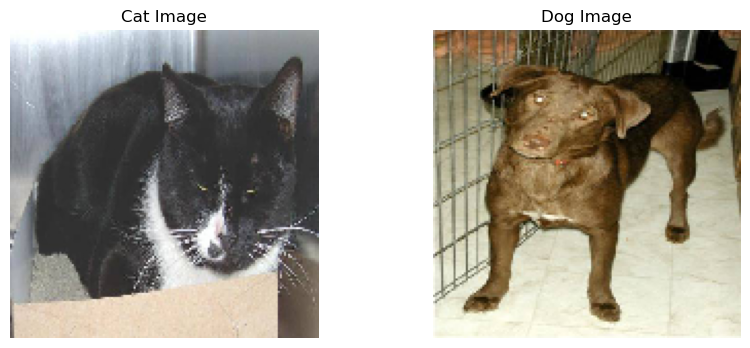

In [12]:
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

cats_dir = 'C:/Users/Gopib/Downloads/archive (6)/training_set/training_set/cats'
dogs_dir = 'C:/Users/Gopib/Downloads/archive (6)/training_set/training_set/dogs'

valid_extensions = ['.jpg', '.jpeg', '.png']

cat_images = []
dog_images = []

for img_name in os.listdir(cats_dir):
    if any(img_name.lower().endswith(ext) for ext in valid_extensions):  
        img_path = os.path.join(cats_dir, img_name)
        try:
            img = load_img(img_path, target_size=(150, 150))  
            img_array = img_to_array(img) / 255.0  
            cat_images.append(img_array)
        except Exception as e:
            print(f"Could not load image {img_name}: {e}")
for img_name in os.listdir(dogs_dir):
    if any(img_name.lower().endswith(ext) for ext in valid_extensions):  
        img_path = os.path.join(dogs_dir, img_name)
        try:
            img = load_img(img_path, target_size=(150, 150))  
            img_array = img_to_array(img) / 255.0  
            dog_images.append(img_array)
        except Exception as e:
            print(f"Could not load image {img_name}: {e}") 
print(f"Loaded {len(cat_images)} cat images.")
print(f"Loaded {len(dog_images)} dog images.")
images = np.array(cat_images + dog_images)
labels = np.array([0] * len(cat_images) + [1] * len(dog_images))  
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)
print(f"Training data shape: {X_train.shape}, {y_train.shape}")
print(f"Test data shape: {X_test.shape}, {y_test.shape}")
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(X_train[0]) 
plt.title("Cat Image")
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(dog_images[0])  
plt.title("Dog Image")
plt.axis('off')
plt.show()

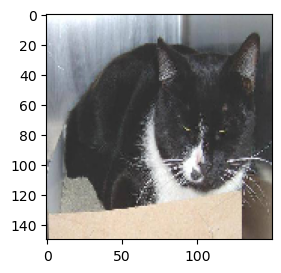

In [5]:
plt.subplot(1, 2, 1)
plt.imshow(X_train[0])  # Display the first cat image from the training set


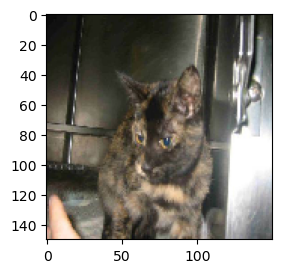

In [8]:
plt.subplot(1, 2, 2)
plt.imshow(X_train[len(cat_images)])  # Display the first dog image from the training set


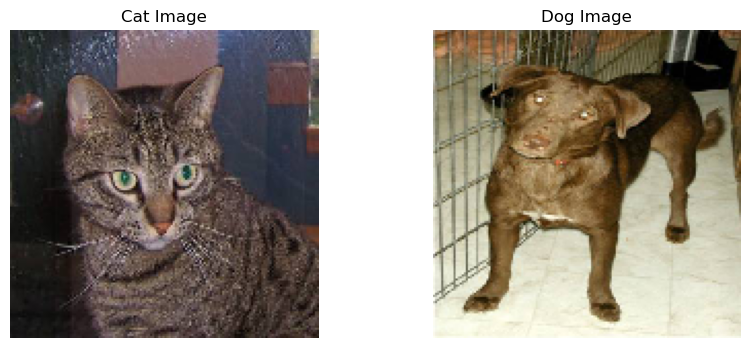

In [18]:
# Visualize a sample cat and dog image
plt.figure(figsize=(10, 4))

# Display the first cat image from the cat_images list
plt.subplot(1, 2, 1)
plt.imshow(cat_images[0])  # Display the first cat image
plt.title("Cat Image")
plt.axis('off')

# Display the first dog image from the dog_images list
plt.subplot(1, 2, 2)
plt.imshow(dog_images[0])  # Display the first dog image
plt.title("Dog Image")
plt.axis('off')

plt.show()
